In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers as tfl
from tensorflow.keras import preprocessing


In [2]:
print(f"Tensorlow version  {tf.__version__}")

Tensorlow version  2.16.1


# DATA PREPROCESSING

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train = train["label"]
X_train = train.drop(labels = ["label"],axis=1)


X_train /= 255.0
test /= 255.0



In [6]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [7]:
X_train = X_train.values.reshape(-1,28,28,1) # 

In [8]:
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)

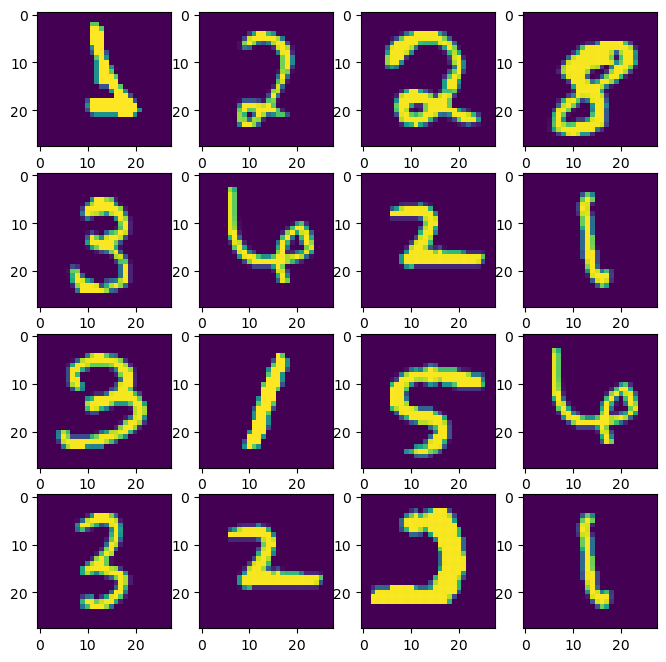

In [9]:
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 4
for i in range(1,columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[np.random.randint(1,100)])
plt.show()



In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Define a model

In [11]:
model = tf.keras.Sequential([
    tfl.InputLayer(input_shape=[28, 28, 1]), # (28,28,1)
    # tfl.BatchNormalization(),
    tfl.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding="same"),#(28,28,64)
    tfl.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding="same"),#(28,28,64)
    tfl.Dropout(0.2),
    tfl.MaxPooling2D(2,2),#(14, 14, 64)
    # tfl.BatchNormalization(),
    tfl.Conv2D(filters = 32,kernel_size=(3,3),activation='relu',padding="same"),#(14, 14, 32)
    tfl.Conv2D(filters = 32,kernel_size=(3,3),activation='relu',padding="same"),#(14, 14, 32)
    tfl.Dropout(0.2),
    tfl.MaxPooling2D(2,2),#(7, 7, 32)
    # tfl.BatchNormalization(),
    tfl.Conv2D(filters = 16,kernel_size=(3,3),activation='relu',padding="same"),#(7, 7, 16)
    tfl.Conv2D(filters = 16,kernel_size=(3,3),activation='relu',padding="same"),#(7, 7, 16)
    # tfl.BatchNormalization(),
    tfl.Dropout(0.2),
    tfl.Flatten(),#(,784)
    tfl.Dense(units=256,activation='relu'),#(1,256)
    # tfl.Dropout(0.2),
    tfl.Dense(units=10,activation="softmax")#(1,10)
])

C:\Users\strat\ProgramData\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275,754 (1.05 MB)

 Trainable params: 275,754 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

## Model fit and test

In [13]:
model.compile(optimizer = "adam" , loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(64)

In [15]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 120s 221ms/step - accuracy: 0.8423 - loss: 0.4762 - val_accuracy: 0.9774 - val_loss: 0.0778
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 117s 223ms/step - accuracy: 0.9755 - loss: 0.0773 - val_accuracy: 0.9824 - val_loss: 0.0550
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 111s 211ms/step - accuracy: 0.9829 - loss: 0.0555 - val_accuracy: 0.9879 - val_loss: 0.0382
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 107s 205ms/step - accuracy: 0.9871 - loss: 0.0433 - val_accuracy: 0.9890 - val_loss: 0.0321
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 115s 220ms/step - accuracy: 0.9890 - loss: 0.0357 - val_accuracy: 0.9879 - val_loss: 0.0409
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 115s 220ms/step - accuracy: 0.9899 - loss: 0.0320 - val_accuracy: 0.9852 - val_loss: 0.0506
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 117s 223ms/step - accuracy: 0.9908 - loss: 0.0287 - val_accuracy: 0.9881 - val_loss: 0.0401
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 118s 225ms/step - accuracy: 0.9908 -

In [16]:
test = test.values.reshape(-1,28,28,1)


In [17]:
results = model.predict(test)

results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 38s 43ms/step


In [18]:
results

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

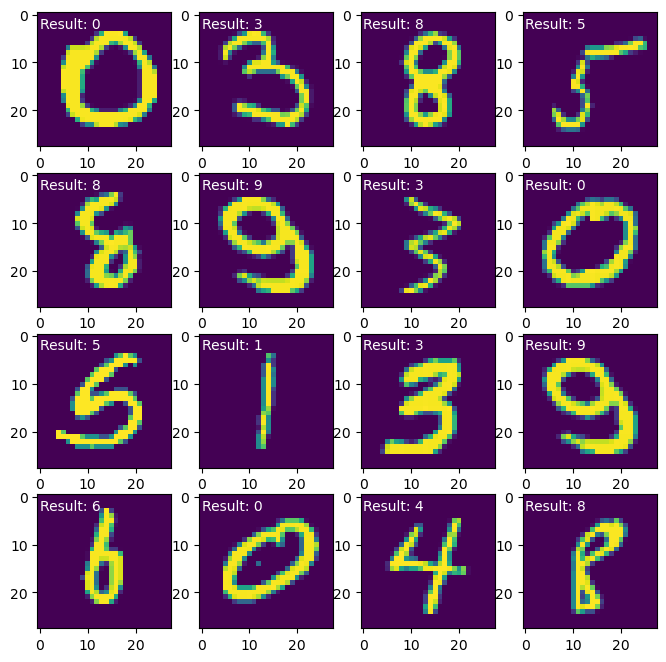

In [26]:
rows = 4
columns = 4
fig = plt.figure(figsize=(8, 8))
np.random.seed(2)
for i in range(1, rows * columns + 1):
    temp = np.random.randint(1, 200)
    ax = fig.add_subplot(rows, columns, i)
    ax.imshow(test[temp])
    ax.text(0, 2, f'Result: {results[temp]}', color='white', fontsize=10, ha='left', va='center')
plt.show()

In [136]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)